In [3]:
# Cell 1: Basic imports & versions

import sys

import numpy as np
import pandas as pd
import matplotlib
import sklearn
import skimage
import cv2
import torch
import statsmodels.api as sm

print("Python:", sys.version)
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("Matplotlib:", matplotlib.__version__)
print("scikit-learn:", sklearn.__version__)
print("scikit-image:", skimage.__version__)
print("OpenCV:", cv2.__version__)
print("PyTorch:", torch.__version__)
print("Statsmodels:", sm.__version__)


Python: 3.12.10 (tags/v3.12.10:0cc8128, Apr  8 2025, 12:21:36) [MSC v.1943 64 bit (AMD64)]
NumPy: 2.2.6
Pandas: 2.3.3
Matplotlib: 3.10.7
scikit-learn: 1.7.2
scikit-image: 0.25.2
OpenCV: 4.12.0
PyTorch: 2.5.1+cu121
Statsmodels: 0.14.5


In [4]:
# Cell 2: Check CUDA / GPU

import torch

print("CUDA available:", torch.cuda.is_available())

if torch.cuda.is_available():
    print("GPU count:", torch.cuda.device_count())
    print("Current device:", torch.cuda.current_device())
    print("GPU name:", torch.cuda.get_device_name(0))
else:
    print("Running on CPU only.")


CUDA available: True
GPU count: 1
Current device: 0
GPU name: NVIDIA GeForce RTX 3060


In [5]:
# Cell 3: Quick NumPy + Pandas test

import numpy as np
import pandas as pd

# Create a small random dataset
data = np.random.randn(5, 3)
df = pd.DataFrame(data, columns=["A", "B", "C"])

print("DataFrame:")
display(df)

print("\nDescribe:")
display(df.describe())


DataFrame:


,A,B,C
0,-0.491457,0.857976,0.468635
1,-1.400511,-0.019688,0.327386
2,-0.788431,0.205941,-2.224586
3,-0.308540,-1.103320,0.297205
4,0.047825,-0.509120,0.902330



Describe:


,A,B,C
count,5.000000,5.000000,5.000000
mean,-0.588223,-0.113642,-0.045806
std,0.545903,0.740079,1.241735
min,-1.400511,-1.103320,-2.224586
25%,-0.788431,-0.509120,0.297205
50%,-0.491457,-0.019688,0.327386
75%,-0.308540,0.205941,0.468635
max,0.047825,0.857976,0.902330


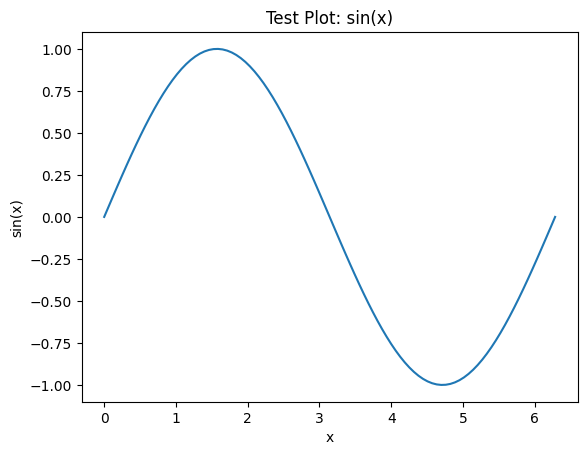

In [6]:
# Cell 4: Simple Matplotlib plot

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

plt.figure()
plt.plot(x, y)
plt.title("Test Plot: sin(x)")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.show()


In [7]:
# Cell 5: scikit-learn – confusion matrix test

from sklearn.metrics import confusion_matrix, classification_report

y_true = [0, 1, 1, 0, 1, 0]
y_pred = [0, 1, 0, 0, 1, 1]

cm = confusion_matrix(y_true, y_pred)
print("Confusion matrix:\n", cm)

print("\nClassification report:\n", classification_report(y_true, y_pred))


Confusion matrix:
 [[2 1]
 [1 2]]

Classification report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.67      0.67      0.67         6
weighted avg       0.67      0.67      0.67         6



In [8]:
# Cell 6: OpenCV + simple image ops

import cv2
import numpy as np

# Create a dummy image (black with a white square)
img = np.zeros((200, 200, 3), dtype=np.uint8)
cv2.rectangle(img, (50, 50), (150, 150), (255, 255, 255), -1)

print("Image shape:", img.shape)

# Resize
resized = cv2.resize(img, (100, 100))
print("Resized shape:", resized.shape)


Image shape: (200, 200, 3)
Resized shape: (100, 100, 3)


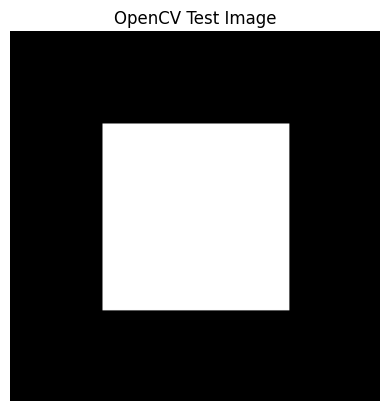

In [9]:
# OPTIONAL: Display the OpenCV image using matplotlib

import matplotlib.pyplot as plt

# Convert BGR -> RGB (though here it's just black/white)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(img_rgb)
plt.title("OpenCV Test Image")
plt.axis("off")
plt.show()


In [10]:
# Cell 7: Statsmodels – simple linear regression

import numpy as np
import statsmodels.api as sm

# Simple linear relation: y = 2x + 1 + noise
np.random.seed(0)
X = np.linspace(0, 10, 50)
y = 2 * X + 1 + np.random.normal(scale=1.0, size=X.shape)

X_with_const = sm.add_constant(X)  # adds intercept
model = sm.OLS(y, X_with_const)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     1315.
Date:                Sun, 16 Nov 2025   Prob (F-statistic):           1.54e-36
Time:                        18:06:31   Log-Likelihood:                -73.192
No. Observations:                  50   AIC:                             150.4
Df Residuals:                      48   BIC:                             154.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8464      0.297      6.207      0.0

In [11]:
# Cell 8: Test ultralytics (YOLO)

from ultralytics import YOLO

# This will try to download a small YOLOv8 model (yolov8n) on first run.
# Make sure you have internet, or change path to a local model if you have one.
model = YOLO("yolov8n.pt")

print("YOLO model loaded successfully!")

# Create a dummy image (solid color) to run a fake prediction
import numpy as np

dummy_img = np.zeros((640, 640, 3), dtype=np.uint8)
results = model.predict(source=dummy_img, verbose=False)

print("YOLO prediction ran successfully. Number of results:", len(results))


Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\Gabriel\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
YOLO model loaded successfully!
YOLO prediction ran successfully. Number of results: 1


In [12]:
# Cell 9: Test diffusers / transformers imports (no heavy generation)

from diffusers import StableDiffusionPipeline
from transformers import AutoTokenizer

print("Diffusers and Transformers imported successfully.")

# Just show classes; avoid downloading a full model here
print("StableDiffusionPipeline class:", StableDiffusionPipeline)
print("AutoTokenizer class:", AutoTokenizer)


c:\Users\Gabriel\Documents\Dissertation\Code\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Diffusers and Transformers imported successfully.
StableDiffusionPipeline class: <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'>
AutoTokenizer class: <class 'transformers.models.auto.tokenization_auto.AutoTokenizer'>
